# Reliance Financial Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data

ril = pd.read_csv(r'C:\Users\Administrator\Desktop\DATA\Python Test Data\Stock\reliance\reliance.csv')
ril.set_index('Date' , inplace=True)
ril.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-18,437.450012,447.000000,436.100006,445.774994,425.264313,4501964.0
2015-05-19,445.625000,452.375000,443.299988,447.774994,427.172302,6634872.0
2015-05-20,450.200012,455.500000,448.850006,454.424988,433.516296,3981412.0
2015-05-21,455.625000,457.700012,447.049988,448.375000,427.744659,4918892.0
2015-05-22,448.500000,452.799988,448.500000,451.924988,431.131348,3816904.0


In [3]:
# creating new columns

ril['PriceDiff'] = ril['Close'].shift(-1) - ril['Close']

#returns columns

ril['Return'] = ril['PriceDiff'] / ril['Close']

#direction column (1 if UP 0 if DOWN)

ril['Direction'] = [1 if ril['PriceDiff'].loc[ei]>0 else 0 for ei in ril.index]

ril.head(10)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2015-05-18,437.450012,447.000000,436.100006,445.774994,425.264313,4501964.0,2.000000,0.004487,1
2015-05-19,445.625000,452.375000,443.299988,447.774994,427.172302,6634872.0,6.649994,0.014851,1
2015-05-20,450.200012,455.500000,448.850006,454.424988,433.516296,3981412.0,-6.049988,-0.013314,0
2015-05-21,455.625000,457.700012,447.049988,448.375000,427.744659,4918892.0,3.549988,0.007917,1
2015-05-22,448.500000,452.799988,448.500000,451.924988,431.131348,3816904.0,-4.674988,-0.010345,0
2015-05-25,450.000000,454.000000,446.174988,447.250000,426.671448,3025224.0,-4.950012,-0.011068,0
2015-05-26,447.500000,448.000000,441.350006,442.299988,421.949188,4347766.0,0.350006,0.000791,1
2015-05-27,443.000000,445.450012,440.100006,442.649994,422.283112,3693098.0,-4.750000,-0.010731,0
2015-05-28,442.924988,447.125000,436.000000,437.899994,417.751648,12132678.0,0.600006,0.001370,1


In [4]:
ril.tail(10)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2020-05-04,1426.479980,1451.239990,1404.140015,1421.719971,1421.719971,24670336.0,25.210083,0.017732,1
2020-05-05,1440.050049,1465.109985,1433.609985,1446.930054,1446.930054,20723079.0,0.099975,0.000069,1
2020-05-06,1450.250000,1471.010010,1431.930054,1447.030029,1447.030029,18685710.0,45.770020,0.031630,1
2020-05-07,1441.339966,1499.439941,1431.430054,1492.800049,1492.800049,23087436.0,54.329956,0.036395,1
2020-05-08,1530.489990,1565.060059,1522.670044,1547.130005,1547.130005,38887255.0,14.859985,0.009605,1
2020-05-11,1565.160034,1599.839966,1557.540039,1561.989990,1561.989990,30959745.0,-96.630005,-0.061863,0
2020-05-12,1550.109985,1553.619995,1451.239990,1465.359985,1465.359985,46465281.0,31.089966,0.021217,1
2020-05-13,1527.000000,1527.000000,1454.000000,1496.449951,1496.449951,30657492.0,-60.500000,-0.040429,0
2020-05-14,1469.000000,1496.699951,1430.050049,1435.949951,1435.949951,22736607.0,23.450073,0.016331,1


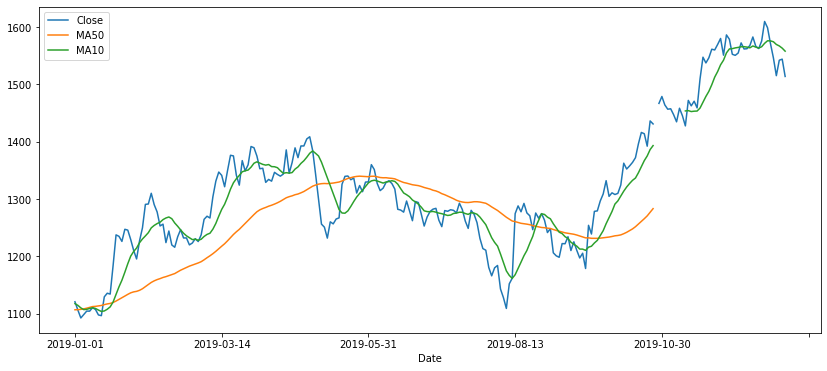

In [5]:
# 50 day Moving Average

ril['ma50'] = ril['Close'].rolling(50).mean()
ril['ma10'] = ril['Close'].rolling(10).mean()

#plotting
plt.figure(figsize=[14,6])

ril['Close'].loc['2019-01-01':'2019-12-31'].plot(label='Close')
ril['ma50'].loc['2019-01-01':'2019-12-31'].plot(label='MA50')
ril['ma10'].loc['2019-01-01':'2019-12-31'].plot(label='MA10')
plt.legend()
plt.show()


# Making the strategy

In [6]:
ril['MA10'] = ril['Close'].rolling(10).mean()
ril['MA50'] = ril['Close'].rolling(50).mean()
ril = ril.dropna()
ril.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma50,MA10,MA50
Date,,,,,,,,,,,,
2015-07-24,524.000000,524.825012,510.549988,512.525024,488.943054,5988726.0,-9.850036,-0.019219,0,478.026501,510.732507,478.026501
2015-07-27,512.450012,514.950012,500.875000,502.674988,479.546265,9197526.0,2.450012,0.004874,1,479.164501,510.650006,479.164501
2015-07-28,504.149994,508.350006,500.049988,505.125000,481.883545,6118202.0,-7.125000,-0.014105,0,480.311501,511.272507,480.311501
2015-07-29,504.750000,506.350006,496.049988,498.000000,475.086365,6761866.0,2.075012,0.004167,1,481.183001,510.515005,481.183001
2015-07-30,500.049988,504.000000,496.149994,500.075012,477.065887,5349408.0,0.849976,0.001700,1,482.217001,509.337506,482.217001


In [7]:
#buying shares

ril['Shares'] = [1 if ril.loc[i,'MA10'] > ril.loc[i,'MA50'] else 0 for i in ril.index]

In [8]:
# Adding the profit column

ril['Close1'] = ril['Close'].shift(-1)

ril['Profit'] = [ril.loc[i , 'Close1'] - ril.loc[i , 'Close'] if ril.loc[i,'Shares']==1 else 0 for i in ril.index]

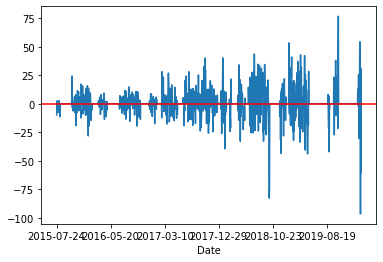

In [9]:
ril['Profit'].plot()
plt.axhline(y=0 , color='red')

In [10]:
# calculating the total wealth generated

ril['Wealth'] = ril['Profit'].cumsum()

In [11]:
ril.head(10)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma50,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,,,,,
2015-07-24,524.000000,524.825012,510.549988,512.525024,488.943054,5988726.0,-9.850036,-0.019219,0,478.026501,510.732507,478.026501,1,502.674988,-9.850036,-9.850036
2015-07-27,512.450012,514.950012,500.875000,502.674988,479.546265,9197526.0,2.450012,0.004874,1,479.164501,510.650006,479.164501,1,505.125000,2.450012,-7.400024
2015-07-28,504.149994,508.350006,500.049988,505.125000,481.883545,6118202.0,-7.125000,-0.014105,0,480.311501,511.272507,480.311501,1,498.000000,-7.125000,-14.525024
2015-07-29,504.750000,506.350006,496.049988,498.000000,475.086365,6761866.0,2.075012,0.004167,1,481.183001,510.515005,481.183001,1,500.075012,2.075012,-12.450012
2015-07-30,500.049988,504.000000,496.149994,500.075012,477.065887,5349408.0,0.849976,0.001700,1,482.217001,509.337506,482.217001,1,500.924988,0.849976,-11.600036
2015-07-31,500.000000,503.950012,495.000000,500.924988,477.876801,7604624.0,0.300018,0.000599,1,483.197001,508.345004,483.197001,1,501.225006,0.300018,-11.300018
2015-08-03,500.500000,506.924988,499.700012,501.225006,478.162994,4520364.0,-7.225006,-0.014415,0,484.276501,507.230005,484.276501,1,494.000000,-7.225006,-18.525024
2015-08-04,501.700012,502.825012,490.000000,494.000000,471.270386,5489138.0,-0.125000,-0.000253,0,485.310502,506.240005,485.310502,1,493.875000,-0.125000,-18.650024
2015-08-05,494.125000,500.399994,492.049988,493.875000,471.151154,6558056.0,-4.399994,-0.008909,0,486.335002,503.107504,486.335002,1,489.475006,-4.399994,-23.050018


Wealth INR367.54974300000026


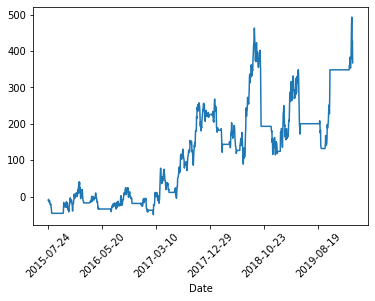

<Figure size 1440x432 with 0 Axes>

In [24]:
#plotting the wealth

ril['Wealth'].plot(rot='45')
plt.figure(figsize=[20,6])
plt.tight_layout()
print('Wealth INR{}'.format(ril.loc[ril.index[-2] , 'Wealth']))